import of useful packages

In [2]:
!pip install lxml
!pip3 install html5lib
!pip3 install BeautifulSoup4
!pip3 install pandas

import html5lib

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


## discovery of the map Paris
coordinates of paris

In [3]:
address = 'Paris, France'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


listing of the "arrondissements" (neighbourhoods) with a dataframe from the city of paris

In [4]:
column_names = ['Arrondissement', 'Latitude', 'Longitude'] 
Arrondissements = pd.DataFrame(columns=column_names)

In [5]:
url= 'https://opendata.paris.fr/api/records/1.0/search/?dataset=arrondissements&q=&facet=c_ar&facet=c_arinsee&facet=l_ar&rows=20'
results = requests.get(url).json()
normalized = pd.json_normalize(results)
#print(normalized)
Paris_data=normalized['records']
arr_List=pd.DataFrame(Paris_data)['records'][0]

for arr in arr_List:
    it=arr['fields']
    borough = it['l_ar']
    coord= it['geom_x_y']
    neighborhood_lat = coord[0]
    neighborhood_lon = coord[1]
    surf=int(arr['fields']['surface'])
    Arrondissements = Arrondissements.append({'Arrondissement': borough,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon,
                                          'Surface': surf},ignore_index=True)

print(Arrondissements)
Arrondissements.sort_values('Arrondissement').reset_index()
Arrondissements

   Arrondissement   Latitude  Longitude     Surface
0        1er Ardt  48.862563   2.336443   1824612.0
1       2ème Ardt  48.868279   2.342803    991153.0
2      19ème Ardt  48.887076   2.384821   6792651.0
3      11ème Ardt  48.859059   2.380058   3665441.0
4      10ème Ardt  48.876130   2.360728   2891739.0
5      17ème Ardt  48.887327   2.306777   5668834.0
6      20ème Ardt  48.863461   2.401188   5983446.0
7      15ème Ardt  48.840085   2.292826   8494994.0
8      12ème Ardt  48.834974   2.421325  16314782.0
9       4ème Ardt  48.854341   2.357630   1600585.0
10     14ème Ardt  48.829245   2.326542   5614877.0
11     13ème Ardt  48.828388   2.362272   7149311.0
12      6ème Ardt  48.849130   2.332898   2153095.0
13      5ème Ardt  48.844443   2.350715   2539374.0
14      8ème Ardt  48.872721   2.312554   3880036.0
15     16ème Ardt  48.860392   2.261971  16372542.0
16      9ème Ardt  48.877164   2.337458   2178303.0
17     18ème Ardt  48.892569   2.348161   5996051.0
18      3ème

Arrondissement   Latitude  Longitude     Surface
0        1er Ardt  48.862563   2.336443   1824612.0
1       2ème Ardt  48.868279   2.342803    991153.0
2      19ème Ardt  48.887076   2.384821   6792651.0
3      11ème Ardt  48.859059   2.380058   3665441.0
4      10ème Ardt  48.876130   2.360728   2891739.0
5      17ème Ardt  48.887327   2.306777   5668834.0
6      20ème Ardt  48.863461   2.401188   5983446.0
7      15ème Ardt  48.840085   2.292826   8494994.0
8      12ème Ardt  48.834974   2.421325  16314782.0
9       4ème Ardt  48.854341   2.357630   1600585.0
10     14ème Ardt  48.829245   2.326542   5614877.0
11     13ème Ardt  48.828388   2.362272   7149311.0
12      6ème Ardt  48.849130   2.332898   2153095.0
13      5ème Ardt  48.844443   2.350715   2539374.0
14      8ème Ardt  48.872721   2.312554   3880036.0
15     16ème Ardt  48.860392   2.261971  16372542.0
16      9ème Ardt  48.877164   2.337458   2178303.0
17     18ème Ardt  48.892569   2.348161   5996051.0
18      3ème Ardt  48.862872   2.360001   1170882.0
19      7ème Ardt  48.856174   2.312188   4090057.0

map of Paris with the arrondissements

In [6]:
paris_map = folium.Map(location=[latitude, longitude], zoom_start=12)
neib = folium.map.FeatureGroup()
for lat, lng, neighborhood in zip(Arrondissements.Latitude, Arrondissements.Longitude, Arrondissements.Arrondissement):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            popup=label,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
    ).add_to(paris_map)
display(paris_map)

## Collection of the venues
the idea is to collect luxury venues (hotels, retaurants, boutiques)

In [7]:
CLIENT_ID = 'K1YJMSLXM3RMYGIJ0TBQZ3XHF50WALAAMZD00JUX1F5YRCU5' # your Foursquare ID
CLIENT_SECRET = 'KS2OLJJB0M4VAVQXKCFFQRRDRNNGKSIMAS1OGAIDWR0QFQAU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: K1YJMSLXM3RMYGIJ0TBQZ3XHF50WALAAMZD00JUX1F5YRCU5
CLIENT_SECRET:KS2OLJJB0M4VAVQXKCFFQRRDRNNGKSIMAS1OGAIDWR0QFQAU


function to get the venue by type

In [8]:
def getNearbyVenues(names, latitudes, longitudes, venuetype, radius=850):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            venuetype)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        loc_list=[]
        # return only relevant information for each nearby venue
        for v in results:
            try:
                loc_list.append([
                    v['venue']['name'], 
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'],
                    v['venue']['location']['postalCode'][-2:],
                    v['venue']['categories'][0]['name']])
            except:
                pass
                   
        venues_list.append(loc_list)
            
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        #print(nearby_venues)
        nearby_venues.columns = [ 
                  'Venue', 
                  'Latitude', 
                  'Longitude',
                  'PostalCode',
                  'VenueCategory']
    
    return(nearby_venues)

getting all the venues

In [9]:
LIMIT = 150
df_hotels = getNearbyVenues(Arrondissements.Arrondissement,Arrondissements.Latitude, Arrondissements.Longitude, 'Luxury Hotel',)
df_hotels.shape

(278, 5)

In [16]:
df_restaurant = getNearbyVenues(Arrondissements.Arrondissement,Arrondissements.Latitude, Arrondissements.Longitude, 'French Restaurant',)

In [10]:
df_fashion = getNearbyVenues(Arrondissements.Arrondissement,Arrondissements.Latitude, Arrondissements.Longitude, 'Boutique',)

In [11]:
df_jewel = getNearbyVenues(Arrondissements.Arrondissement,Arrondissements.Latitude, Arrondissements.Longitude, 'Jewelry',)

In [12]:
df_perf = getNearbyVenues(Arrondissements.Arrondissement,Arrondissements.Latitude, Arrondissements.Longitude, 'Perfume shop',)

In [13]:
df_watch = getNearbyVenues(Arrondissements.Arrondissement,Arrondissements.Latitude, Arrondissements.Longitude, 'watch shop',)

In [77]:
df_jewel
df_perf
df_watch

removing irrelevant venues

In [14]:
lis =['Miscellaneous Shop','Mobile Phone Shop','Travel Agency']

id_to_rem=df_fashion.loc[df_fashion['VenueCategory'].isin(lis)].index
df_fashion.drop(id_to_rem, inplace=True)
df_fashion.shape

(392, 5)

In [17]:
df_Paris=pd.concat([df_hotels,df_fashion,df_jewel,df_perf,df_watch, df_restaurant])
df_Paris.drop_duplicates(keep=False, inplace=True)
keeplist=['Accessories Store' ,'Art Gallery' ,'Arts & Crafts Store','Bar','Boutique','Clothing Store','Cosmetics Shop','Department Store' ,'Design Studio','French Restaurant','Hotel' ,'Hotel Bar','Jewelry Store','Lingerie Store','Men\'s Store','Perfume Shop' ,'Resort' ,'Shoe Store']
df_Paris=df_Paris.loc[df_Paris['VenueCategory'].isin(keeplist)]


map of the venues

In [19]:
paris_map = folium.Map(location=[latitude, longitude], zoom_start=12)
neib = folium.map.FeatureGroup()
for lat, lng, ven in zip(df_Paris.Latitude, df_Paris.Longitude, df_Paris.Venue):
    label = '{}'.format(ven)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
    ).add_to(paris_map)
display(paris_map)

Clustering with k-means

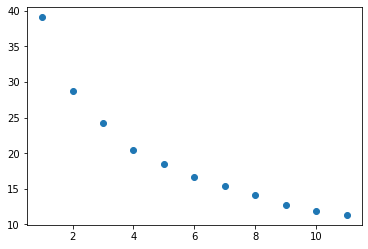

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k=range(1, 12)
results= np.zeros(11)
paris_clustering = df_Paris[['Latitude','Longitude']]
# run k-means clustering
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(paris_clustering)
    df_Paris['cluster']=kmeans.labels_
    kmeans2 = KMeans(n_clusters=i, random_state=0).fit_transform (paris_clustering)
    result = sum(min(a) for a in kmeans2)
    #print(result)
    results[i-1]=result
plt.scatter(k,results)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(paris_clustering)
df_Paris['cluster']=kmeans.labels_
centers=kmeans.cluster_centers_

display if the clusters

In [23]:
paris_map_cl = folium.Map(location=[latitude, longitude], zoom_start=12)
neib = folium.map.FeatureGroup()
colorlist=['yellow', 'green', 'blue', 'red', 'black', 'purple','orange','white','brown','pink']
for lat, lng, ven, cluster in zip(df_Paris.Latitude, df_Paris.Longitude, df_Paris.Venue, df_Paris.cluster):
    label = '{}, '.format(ven)
    label = folium.Popup(label, parse_html=True)
    cl = colorlist[cluster]
    folium.features.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            popup=label,
            color=cl,
            fill=True,
            fill_color=cl,
            fill_opacity=0.6
    ).add_to(paris_map_cl)

for x in centers:
    cl = colorlist[cluster]
    folium.features.Marker(
            x # define how big you want the circle markers to be
    ).add_to(paris_map_cl)
display(paris_map_cl)

attributing venues to arrondissments

In [24]:
paris_onehot = pd.get_dummies(df_Paris[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['PostalCode'] = df_Paris['PostalCode'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

PostalCode  Accessories Store  Art Gallery  Arts & Crafts Store  Bar  \
4          01                  0            0                    0    0   
5          01                  0            0                    0    0   
7          01                  0            0                    0    0   
9          02                  0            0                    0    0   
10         01                  0            0                    0    0   

    Boutique  Clothing Store  Cosmetics Shop  Department Store  Design Studio  \
4          0               0               0                 0              0   
5          0               0               0                 0              0   
7          0               0               0                 0              0   
9          0               0               0                 0              0   
10         0               0               0                 0              0   

    French Restaurant  Hotel  Hotel Bar  Jewelry Store  Lingerie Store  \
4                   0      1          0              0               0   
5                   0      1          0              0               0   
7                   0      1          0              0               0   
9                   0      1          0              0               0   
10                  0      1          0              0               0   

    Men's Store  Perfume Shop  Resort  Shoe Store  
4             0             0       0           0  
5             0             0       0           0  
7             0             0       0           0  
9             0             0       0           0  
10            0             0       0           0

computing of each type of venue for each aroondissement

In [25]:
paris_grouped = paris_onehot.groupby('PostalCode').sum().reset_index()
paris_grouped.drop([0,21],inplace=True)
paris_grouped.reset_index(inplace=True)

paris_grouped[['Latitude', 'Longitude', 'Surface']]=Arrondissements[['Latitude', 'Longitude','Surface']]#pd.concat([pd.Datarame([0,0]),])
tplist=['Accessories Store', 'Art Gallery','Arts & Crafts Store', 'Bar', 'Boutique', 'Clothing Store','Cosmetics Shop', 'Department Store', 'Design Studio','French Restaurant', 'Hotel', 'Hotel Bar', 'Jewelry Store','Lingerie Store', 'Men\'s Store', 'Perfume Shop', 'Resort', 'Shoe Store']
for i in tplist:
    paris_grouped[i]=paris_grouped[i]/paris_grouped['Surface']
paris_grouped

index PostalCode  Accessories Store   Art Gallery  Arts & Crafts Store  \
0       1         01       1.096123e-06  0.000000e+00         0.000000e+00   
1       2         02       0.000000e+00  0.000000e+00         0.000000e+00   
2       3         03       1.472179e-07  0.000000e+00         0.000000e+00   
3       4         04       0.000000e+00  0.000000e+00         0.000000e+00   
4       5         05       0.000000e+00  0.000000e+00         0.000000e+00   
5       6         06       1.764031e-07  0.000000e+00         0.000000e+00   
6       7         07       0.000000e+00  0.000000e+00         0.000000e+00   
7       8         08       1.177164e-07  1.177164e-07         0.000000e+00   
8       9         09       0.000000e+00  0.000000e+00         0.000000e+00   
9      10         10       6.247716e-07  0.000000e+00         0.000000e+00   
10     11         11       0.000000e+00  0.000000e+00         0.000000e+00   
11     12         12       0.000000e+00  0.000000e+00         0.000000e+00   
12     13         13       0.000000e+00  0.000000e+00         0.000000e+00   
13     14         14       0.000000e+00  0.000000e+00         0.000000e+00   
14     15         15       0.000000e+00  0.000000e+00         2.577296e-07   
15     16         16       0.000000e+00  0.000000e+00         0.000000e+00   
16     17         17       0.000000e+00  0.000000e+00         0.000000e+00   
17     18         18       0.000000e+00  0.000000e+00         0.000000e+00   
18     19         19       0.000000e+00  0.000000e+00         0.000000e+00   
19     20         20       0.000000e+00  0.000000e+00         0.000000e+00   

             Bar      Boutique  Clothing Store  Cosmetics Shop  \
0   0.000000e+00  9.317049e-06    5.480617e-07    0.000000e+00   
1   0.000000e+00  2.017852e-06    0.000000e+00    0.000000e+00   
2   0.000000e+00  1.472179e-06    4.416538e-07    0.000000e+00   
3   0.000000e+00  5.456369e-07    5.456369e-07    0.000000e+00   
4   0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
5   0.000000e+00  2.293241e-06    8.820156e-07    1.764031e-07   
6   0.000000e+00  1.838405e-06    1.671278e-07    0.000000e+00   
7   0.000000e+00  2.825193e-06    5.885819e-07    0.000000e+00   
8   0.000000e+00  1.164588e-06    3.064705e-07    0.000000e+00   
9   0.000000e+00  1.874315e-06    0.000000e+00    0.000000e+00   
10  1.780983e-07  1.780983e-07    5.342949e-07    0.000000e+00   
11  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
12  0.000000e+00  4.644477e-07    0.000000e+00    0.000000e+00   
13  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
14  0.000000e+00  2.577296e-07    0.000000e+00    5.154591e-07   
15  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
16  0.000000e+00  1.377219e-06    0.000000e+00    0.000000e+00   
17  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
18  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
19  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   

    Department Store  Design Studio  French Restaurant         Hotel  \
0       0.000000e+00   0.000000e+00       1.370154e-05  6.028679e-06   
1       0.000000e+00   0.000000e+00       1.109819e-05  5.044630e-06   
2       1.472179e-07   0.000000e+00       3.533230e-06  5.888717e-07   
3       0.000000e+00   0.000000e+00       1.227683e-05  1.091274e-06   
4       0.000000e+00   0.000000e+00       2.455270e-05  1.729063e-06   
5       0.000000e+00   0.000000e+00       1.393585e-05  3.880869e-06   
6       1.671278e-07   0.000000e+00       1.403873e-05  2.506917e-06   
7       0.000000e+00   1.177164e-07       1.094762e-05  3.178342e-06   
8       2.451764e-07   0.000000e+00       3.371176e-06  1.042000e-06   
9       0.000000e+00   0.000000e+00       5.373035e-05  5.622944e-06   
10      1.780983e-07   0.000000e+00       1.442596e-05  2.493376e-06   
11      0.000000e+00   0.000000e+00       1.398736e-07  0.000000e+00   
12      0.000000e+00   0.000000e+00       

clustering of the neighbourhoods

In [27]:
kclusters = 3

paris_grouped_clustering = paris_grouped.drop('PostalCode', 1)

# run k-means clustering
kmeans3 = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans3.labels_[0:10]

paris_grouped_clustering['cluster'] = kmeans3.labels_

map of the clasification of neighbourhoods

In [28]:
paris_clustered_map = folium.Map(location=[latitude, longitude], zoom_start=12)
neib = folium.map.FeatureGroup()
colorlist=['yellow', 'green', 'blue', 'red', 'black', 'purple','orange','white','brown','pink']
for lat, lng, cl in zip(paris_grouped_clustering.Latitude, paris_grouped_clustering.Longitude, paris_grouped_clustering.cluster):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            popup=label,
            color=colorlist[cl],
            fill=True,
            fill_color=colorlist[cl],
            fill_opacity=0.6
    ).add_to(paris_clustered_map)
display(paris_clustered_map)

# Appendix

In [29]:
import re
list_to_delete=[r'Hôtel\s',r'Hotel\s',r'\sHôtel',r'\sHotel']
df_hotels['Venue']=df_hotels['Venue'].replace(regex=list_to_delete, value='')
df_hotels.shape

(278, 5)

In [30]:
haute_couture_list = ['Adeline André', 'Alexis Mabille', 'Atelier Gustavolins', 'Bouchra Jarrar', 'Chanel', 'Christian Dior', 'Frank Sorbier', 'Giambattista Valli', 'Givenchy', 'Jean Paul Gaultier', 'Martin Margiela', 'Julien Fournié', 'Maurizio Galante', 'Stéphane Rolland']
#list directly copied from the link in the report


In [31]:
!pip install BeautifulSoup4
from bs4 import BeautifulSoup as soup
import urllib.request
from urllib.request import Request
from lxml import html

  Using cached https://files.pythonhosted.org/packages/66/25/ff030e2437265616a1e9b25ccc864e0371a0bc3adb7c5a404fd661c6f4f6/beautifulsoup4-4.9.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6f/8f/457f4a5390eeae1cc3aeab89deb7724c965be841ffca6cfca9197482e470/soupsieve-2.0.1-py3-none-any.whl


In [32]:
url = 'https://www.fivestaralliance.com/luxury-hotels/503/europe/france/paris'

hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}
req =Request(url, headers= hdr)
page = urllib.request.urlopen(req).read()

In [33]:
parsed_html = soup(page)
raw = parsed_html.find_all("div", attrs={"class": "all-hotels-row"})

paragraphs = ''
for x in raw:
    paragraphs+=str(x)
print(type(paragraphs))

<class 'str'>


In [34]:
import re

In [60]:
luxury_hotels=re.findall (r'<a href="/luxury-hotels/paris/.+</div>', paragraphs)
for i in range(len(luxury_hotels)):
    str_with_bal = re.search(r'<h3>(.+)</h3>', luxury_hotels[i]).group()
    str_with_bal =str_with_bal [4:-5].replace('Paris','').replace('The','').replace('Hotel ','').replace(' Hotel','')
    if str_with_bal[-1]==' ':
        str_with_bal=str_with_bal [:-1]
    luxury_hotels[i] = str_with_bal


In [45]:
def getVenue(names, latitudes, longitudes, venuetype, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            venuetype)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        loc_list=[]
        # return only relevant information for each nearby venue
        for v in results:
            try:
                loc_list.append([
                    v['venue']['name'], 
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'],
                    v['venue']['location']['postalCode'][-2:],
                    v['venue']['categories'][0]['name']])
            except:
                pass
                   
        venues_list.append(loc_list)
            
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        #print(nearby_venues)
        nearby_venues.columns = [ 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Postal Code',
                  'Venue Category']
    
    return(nearby_venues)

In [62]:
LiMIT=2
for i in luxury_hotels:
    try:
        df_lux_hotels = getVenue(Arrondissements.Arrondissement,Arrondissements.Latitude, Arrondissements.Longitude, i,)
    except:
        pass
df_lux_hotels

Venue  Venue Latitude  \
0             Best Western Paris Louvre Opéra       48.866557   
1   Golden Tulip Hotel Washington Opera Hotel       48.866270   
2               Golden Tulip Washington Opéra       48.866307   
3                               Opéra Comique       48.870981   
4      Holiday Inn Paris Opera - Grands Blvds       48.871577   
5           Citadines Opéra-Grands Boulevards       48.871325   
6                         Hotel Lautrec Opera       48.871143   
7                          Hôtel Corona Opéra       48.871873   
8            Hôtel Mercure Paris Opéra Louvre       48.871114   
9   Golden Tulip Hotel Washington Opera Hotel       48.866270   
10              Golden Tulip Washington Opéra       48.866307   
11                   Grand Hôtel Nouvel Opéra       48.855481   
12                         Hélios Ópera Hotel       48.875239   
13                        Hôtel Opéra Frochot       48.881197   
14                          Cadet Opéra Hôtel       48.875393   
15        Best Western Premier Opéra Faubourg       48.875369   
16             Timhotel Opéra Grands Magasins       48.879515   
17                      Hôtel Excelsior Opéra       48.873600   
18               Hôtel Migny Opéra Montmartre       48.880632   
19          Hotel ibis Paris Opera La Fayette       48.876004   

    Venue Longitude Postal Code Venue Category  
0          2.335172          01          Hotel  
1          2.337254          01          Hotel  
2          2.337239          01          Hotel  
3          2.337787          02   Concert Hall  
4          2.343683          09          Hotel  
5          2.338678          02          Hotel  
6          2.338507          02          Hotel  
7          2.344636          09          Hotel  
8          2.339460          02          Hotel  
9          2.337254          01          Hotel  
10         2.337239          01          Hotel  
11         2.378853          11          Hotel  
12         2.332771          09          Hotel  
13         2.337602          09          Hotel  
14         2.343689          09          Hotel  
15         2.341399          09          Hotel  
16         2.333628          09          Hotel  
17         2.334530          09          Hotel  
18         2.339091          09          Hotel  
19         2.341998          09          Hotel

In [43]:
url2 ='https://www.evous.fr/Restaurants-etoiles-Michelin-a-Paris-1116002.html'
req =Request(url2, headers= hdr)
page2 = urllib.request.urlopen(req).read()


NameError: name 'Request' is not defined

[]
